In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

217.7706227717267


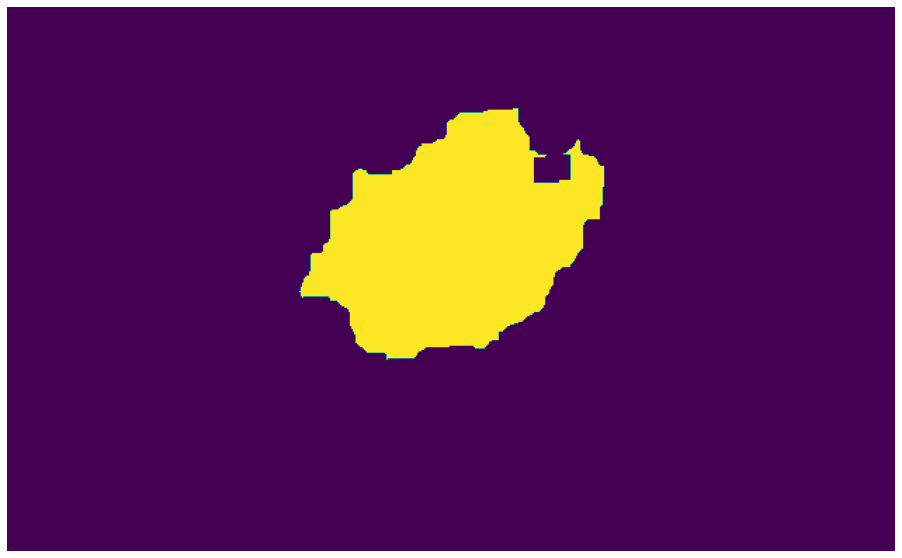

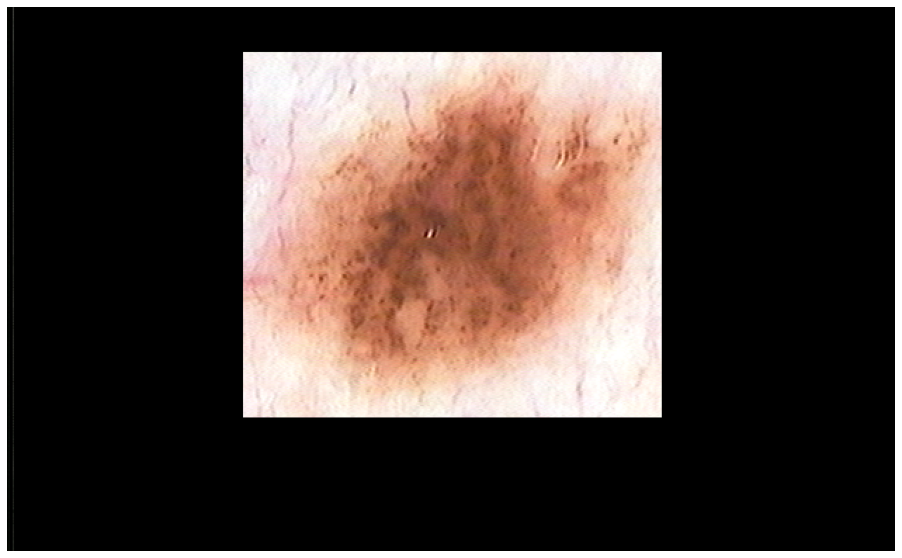

In [174]:
plt.rcParams["figure.figsize"] = (20,10)

#img = cv2.imread('data/samples/F996.BMP',cv2.IMREAD_GRAYSCALE)

img2 = cv2.imread('data/Mole_Data/SET_D/D1.BMP')
img = img2.copy()
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#this code is used to find average color
avg_color_per_row = np.average(img, axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
print(avg_color)

img_blur = cv2.GaussianBlur(img, (9,9), 0)
_, img_binary = cv2.threshold(img_blur,(avg_color-(avg_color/5)), 255, cv2.THRESH_BINARY_INV)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilation = cv2.erode(img_binary, kernel, iterations= 2)

closed = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE, kernel)

plt.axis('off')
plt.imshow(closed)
plt.show()

cnts = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

final = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    
    cv2.rectangle(final, (x - 40,y - 40), (x+w + 40, y+h + 40), (0,0,0), -1)


#I couldn't find something better then +-40 for now, i will check later if it works

_, img_binary = cv2.threshold(final,100, 255, cv2.THRESH_BINARY_INV)

image_masked = cv2.bitwise_and(img2, img_binary)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_masked, cv2.COLOR_BGR2RGB))
plt.show()